# Project-15 Customer Churn

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. In this project we will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.

In [1]:
# importing esential libraries :
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load the dataset :
data=pd.read_csv('customer_churn.csv')

In [3]:
# lets check the first five records :
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
# lets check the last five records :
data.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [5]:
# check the shape of dataset (rows and columns) :
data.shape

(3333, 21)

In [6]:
# check the datatypes :
data.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [7]:
# total information of the dataset :
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [8]:
# lets check the null values :
data.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

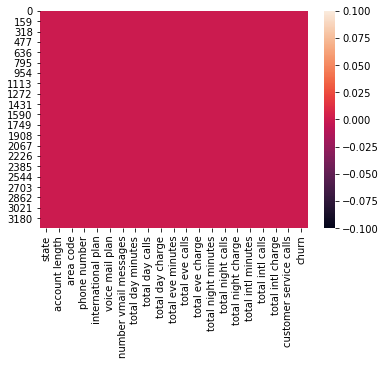

In [9]:
sns.heatmap(data.isnull())

In [10]:
# stastical analysis of all columns :
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [11]:
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [12]:
data['state'].value_counts()

WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
ID     73
VT     73
MI     73
UT     72
TX     72
IN     71
KS     70
MD     70
MT     68
NJ     68
NC     68
WA     66
NV     66
CO     66
RI     65
MA     65
MS     65
AZ     64
MO     63
FL     63
ND     62
ME     62
NM     62
OK     61
NE     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

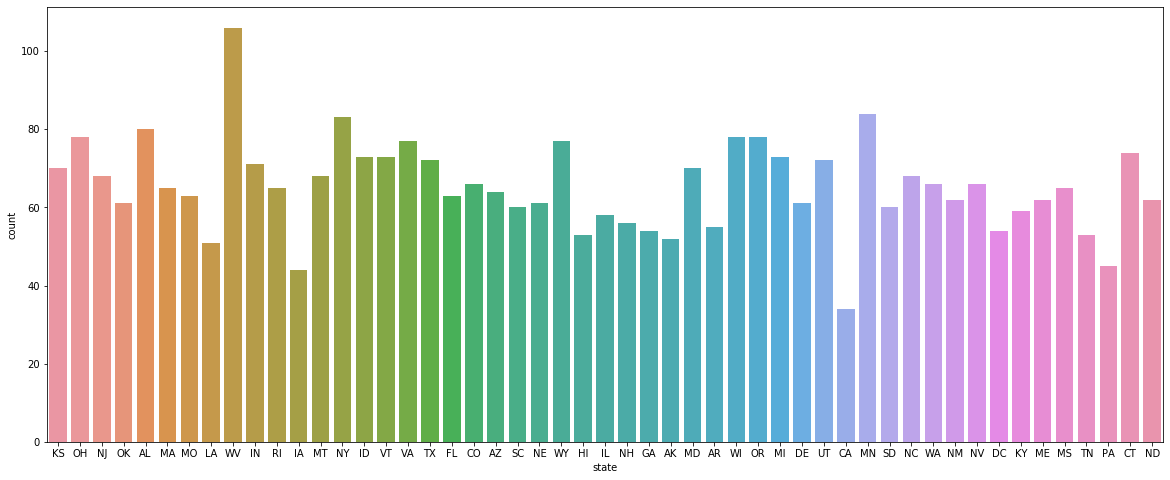

In [13]:
plt.figure(figsize=(20,8))
sns.countplot(data['state'])
plt.show()

In [14]:
data['account length'].unique()

array([128, 107, 137,  84,  75, 118, 121, 147, 117, 141,  65,  74, 168,
        95,  62, 161,  85,  93,  76,  73,  77, 130, 111, 132, 174,  57,
        54,  20,  49, 142, 172,  12,  72,  36,  78, 136, 149,  98, 135,
        34, 160,  64,  59, 119,  97,  52,  60,  10,  96,  87,  81,  68,
       125, 116,  38,  40,  43, 113, 126, 150, 138, 162,  90,  50,  82,
       144,  46,  70,  55, 106,  94, 155,  80, 104,  99, 120, 108, 122,
       157, 103,  63, 112,  41, 193,  61,  92, 131, 163,  91, 127, 110,
       140,  83, 145,  56, 151, 139,   6, 115, 146, 185, 148,  32,  25,
       179,  67,  19, 170, 164,  51, 208,  53, 105,  66,  86,  35,  88,
       123,  45, 100, 215,  22,  33, 114,  24, 101, 143,  48,  71, 167,
        89, 199, 166, 158, 196, 209,  16,  39, 173, 129,  44,  79,  31,
       124,  37, 159, 194, 154,  21, 133, 224,  58,  11, 109, 102, 165,
        18,  30, 176,  47, 190, 152,  26,  69, 186, 171,  28, 153, 169,
        13,  27,   3,  42, 189, 156, 134, 243,  23,   1, 205, 20

In [15]:
data.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

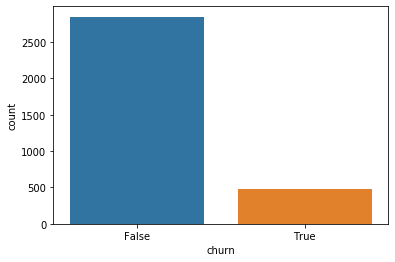

In [16]:
sns.countplot(x="churn",data=data)
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [18]:
data['state']=le.fit_transform(data['state'])

In [19]:
data['international plan']=le.fit_transform(data['international plan'])

In [20]:
data['voice mail plan']=le.fit_transform(data['voice mail plan'])

In [21]:
data.head(2)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
1,35,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False


In [22]:
data['phone number']

0       382-4657
1       371-7191
2       358-1921
3       375-9999
4       330-6626
          ...   
3328    414-4276
3329    370-3271
3330    328-8230
3331    364-6381
3332    400-4344
Name: phone number, Length: 3333, dtype: object

In [23]:
data['phone number']=le.fit_transform(data['phone number'])

In [24]:
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,1926,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,35,107,415,1575,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,31,137,415,1117,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,35,84,408,1707,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,36,75,415,110,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [25]:
data['churn']=le.fit_transform(data['churn'])

In [26]:
data['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [27]:
data.describe()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333.000000,3333.000000,3333.000000,3333.00000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,26.059406,101.064806,437.182418,1666.00000,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,...,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,14.824911,39.822106,42.371290,962.29855,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,...,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,0.000000,1.000000,408.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,74.000000,408.000000,833.00000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,...,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,26.000000,101.000000,415.000000,1666.00000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,...,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,39.000000,127.000000,510.000000,2499.00000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,...,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,50.000000,243.000000,510.000000,3332.00000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,...,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [28]:
dfr=data.corr()
dfr

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
state,1.000000,0.003678,0.015814,0.016168,-0.004597,-0.031664,-0.027762,-0.006737,-0.000764,-0.006736,...,-0.016268,0.013674,0.024576,0.007458,0.024572,-0.007834,0.013967,-0.007819,-0.025861,0.007780
account length,0.003678,1.000000,-0.012463,0.004611,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,...,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
area code,0.015814,-0.012463,1.000000,-0.014270,0.048551,-0.000747,-0.001994,-0.008264,-0.009646,-0.008264,...,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
phone number,0.016168,0.004611,-0.014270,1.000000,0.019892,0.030254,0.022065,0.012279,-0.006253,0.012274,...,0.003419,-0.017662,-0.007790,0.014479,-0.007791,-0.010388,-0.017595,-0.010363,0.033703,0.005626
international plan,-0.004597,0.024735,0.048551,0.019892,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,...,0.006114,0.019106,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852
voice mail plan,-0.031664,0.002918,-0.000747,0.030254,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,...,-0.006444,0.021559,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148
number vmail messages,-0.027762,-0.004628,-0.001994,0.022065,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,...,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total day minutes,-0.006737,0.006216,-0.008264,0.012279,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,...,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total day calls,-0.000764,0.038470,-0.009646,-0.006253,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,...,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total day charge,-0.006736,0.006214,-0.008264,0.012274,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,...,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151


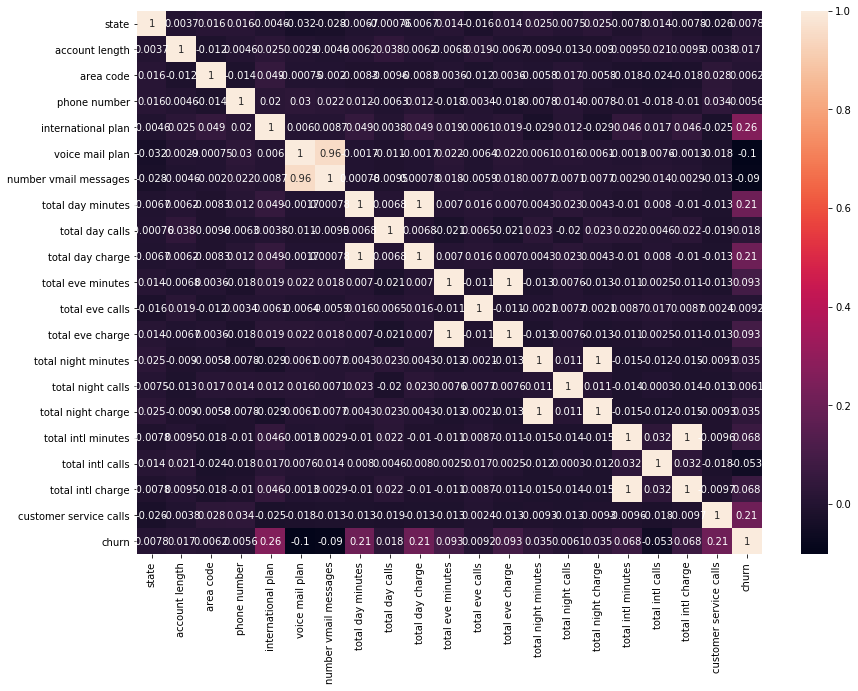

In [29]:
plt.figure(figsize=(14,10))
sns.heatmap(dfr,annot=True)
plt.show()

In [30]:
# split the data into dependent and independent data :
X=data.drop('churn',axis=1)
y=data['churn']

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [32]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [33]:
# importing the essential libraries :
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [34]:
model=[LogisticRegression(),DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),GaussianNB(),RandomForestClassifier()]
for m in model:
    m.fit(X_train,y_train)
    m.score(X_train,y_train)
    predm=m.predict(X_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
0.8545727136431784
[[553  13]
 [ 84  17]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.57      0.17      0.26       101

    accuracy                           0.85       667
   macro avg       0.72      0.57      0.59       667
weighted avg       0.82      0.85      0.82       667



Accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples

In [35]:
#lets chcek random forest also :
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters={"n_estimators":[10,100,500]}
rfc=RandomForestClassifier()
clf = GridSearchCV(rfc, parameters, cv=10,scoring="roc_auc")
clf.fit(X,y)
clf.best_params_

{'n_estimators': 10}

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
cross_val_score(rfc,X,y).mean()

0.9525966746356552

In [37]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_score(y_test, y_pred_rf)

0.9445277361319341

In [38]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 51)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
accuracy_score(y_test, y_pred_dt)

0.9130434782608695

In [39]:
# K – Nearest Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
accuracy_score(y_test, y_pred_knn)

0.881559220389805

# conclusion: we will chose RandomForestClassifier which gives more accuracy

In [40]:
import joblib
joblib.dump(RandomForestClassifier,'rcf.obj')

['rcf.obj']

In [41]:
import joblib
joblib.dump(RandomForestClassifier,'rcf.csv')

['rcf.csv']